In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis




## Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.
* Select only the `date` and `prcp` values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Sort the DataFrame values by `date`.
* Plot the results using the DataFrame `plot` method.

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Select only the date and prcp values

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

one_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dt.datetime(2016, 8, 24)).order_by(Measurement.date).all()
one_year

[('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', None),
 ('2016-08-31', None),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('

In [8]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
df = pd.DataFrame(one_year, columns=['date', 'prcp']).set_index('date')
df

,prcp
date,
2016-08-25,0.08
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.00
2016-08-25,0.21
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


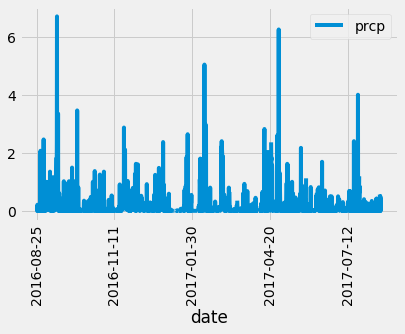

In [9]:
df.plot()
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

* Design a query to calculate the total number of stations.
* Design a query to find the most active stations.
* List the stations and observation counts in descending order.
* Which station has the highest number of observations?
* Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
* Design a query to retrieve the last 12 months of temperature observation data (TOBS).
* Filter by the station with the highest number of observations.
* Plot the results as a histogram with bins=12.

In [11]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Answer: most active - USC00519281
# lowest temp - 54.0
# highest temp - 85.0
# ave temp - 71.66

In [14]:
min_temp = session.query(func.min(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').first()
min_temp

(54.0)

In [15]:
max_temp = session.query(func.max(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').first()
max_temp

(85.0)

In [16]:
ave_temp = session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').first()
ave_temp

(71.66378066378067)

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Answer: most active - USC00519281

sta_last_date = session.query(Measurement.date).\
                filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.date.desc()).first()
sta_last_date

sta_one_year = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date >= dt.datetime(2016, 8, 19)).\
                filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.tobs).all()
sta_one_year

[('2017-02-02', 59.0),
 ('2017-02-08', 59.0),
 ('2017-02-09', 59.0),
 ('2017-02-03', 60.0),
 ('2017-04-30', 60.0),
 ('2017-02-25', 61.0),
 ('2016-12-15', 62.0),
 ('2017-01-06', 62.0),
 ('2017-01-09', 62.0),
 ('2017-01-10', 62.0),
 ('2017-02-10', 62.0),
 ('2017-03-07', 62.0),
 ('2016-11-07', 63.0),
 ('2017-01-04', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-11', 63.0),
 ('2017-01-03', 64.0),
 ('2017-02-07', 64.0),
 ('2017-03-08', 64.0),
 ('2016-12-13', 65.0),
 ('2017-01-12', 65.0),
 ('2017-01-28', 65.0),
 ('2017-02-16', 65.0),
 ('2017-02-27', 65.0),
 ('2017-03-18', 65.0),
 ('2017-05-01', 65.0),
 ('2016-12-12', 66.0),
 ('2017-01-27', 66.0),
 ('2017-03-10', 66.0),
 ('2017-03-13', 66.0),
 ('2017-03-16', 66.0),
 ('2016-11-10', 67.0),
 ('2016-12-05', 67.0),
 ('2016-12-06', 67.0),
 ('2016-12-31', 67.0),
 ('2017-02-26', 67.0),
 ('2017-03-06', 67.0),
 ('2017-03-09', 67.0),
 ('2017-03-14', 67.0),
 ('2017-04-04', 67.0),
 ('2017-04-06', 67.0),
 ('2017-04-10', 67.0),
 ('2017-04-17', 67.0),
 ('2017-04-

In [18]:
df_sta = pd.DataFrame(sta_one_year, columns=['date', 'temperature'])
df_sta

,date,temperature
0,2017-02-02,59.0
1,2017-02-08,59.0
2,2017-02-09,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0
...,...,...
350,2017-07-30,81.0
351,2017-07-23,82.0
352,2017-07-29,82.0
353,2017-08-05,82.0


In [19]:
df_sta.describe()

,temperature
count,355.000000
mean,73.160563
std,4.749025
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


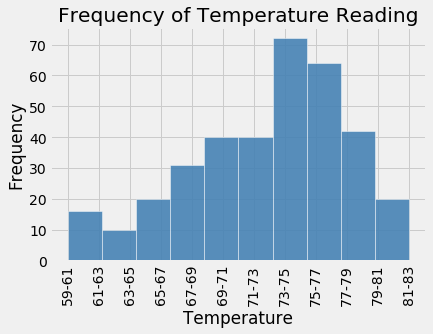

In [20]:
# Histogram
# Create the bins in which Data will be held for ages 
bins = [59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]
# Create the names for the  bins
group_names = ["59-61","61-63","63-65","65-67","67-69","69-71","71-73","73-75","75-77","77-79","79-81","81-83"]
# Cut them
df_sta["ranges"] = pd.cut(df_sta["temperature"], bins, labels=group_names, include_lowest=True)

# Plot Histogram
plt.figure
plt.hist(df_sta.ranges, color="steelblue", alpha=0.90, ec="white")
plt.xticks(rotation=90)
plt.title("Frequency of Temperature Reading")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
